# **Red Neuronal Artificial: PERCEPTRÓN**
```
Proposito : Implementación de perceptrón
Nombre    : Sergio Marcelo Durand Castro
Codigo    : 018200684B
```

# **1. IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# **2. IMPLEMENTACIÓN DE PERCEPTRÓN**



In [2]:
class Perceptron:
  # Constructor de la clase
  def __init__(self, N):
    # Inicialización de los pesos aleatorios
    self.W = np.random.randn(N)
    # Inicialización del sesgo (umbral) aleatorio
    self.Teta = random.random()
    # Guardar el número de características (atributos)
    self.N = N
    # Inicialización de las métricas de evaluación del modelo (matriz de confusión)
    self.MC = {'VP':0,'VN':0,'FP':0,'FN':0}

  # Función de activación sigmoide
  def ActivacionSigmoide(self,X):
    return 1/(1 + math.exp(-X))

  # Función de activación escalón
  def ActivacionEscalon(self,X):
    if (X < 0.5):
        return 0
    else:
        return 1

  # Predicción de perceptrón
  def Prediccion(self, Entradas):
    # Cálculo de la combinación lineal de las entradas y los pesos, y ajuste por el sesgo
    WX = self.W.dot(Entradas) - self.Teta
    # Aplicación de la función de activación sigmoide a la combinación lineal
    self.Y = self.ActivacionSigmoide(WX)
    # Almacenamiento de las entradas para uso posterior
    self.X = Entradas
    # Aplicación de la función de activación escalón a la salida
    return self.ActivacionEscalon(self.Y)

  # Propagación del perceptrón
  def Propagacion(self, Entradas):
    # Cálculo de la combinación lineal de las entradas y los pesos, y ajuste por el sesgo
    WX = self.W.dot(Entradas) - self.Teta
    # Aplicación de la función de activación sigmoide a la combinación lineal
    self.Y = self.ActivacionSigmoide(WX)
    # Almacenamiento de las entradas para uso posterior
    self.X = Entradas
    # Devolución de la salida
    return self.Y

  # Retropropagación
  def RetroPropagacion(self, Alfa, D):
    # Actualización de los pesos del perceptrón para cada característica de entrada
    for i in range(0, self.N):
        self.W[i] = self.W[i] + Alfa * (D - self.Y) * self.X[i]
    # Actualización del sesgo del perceptrón
    self.Teta = self.Teta - Alfa * (D - self.Y)

  # Entrenamiento de perceptrón
  def Entrenar(self, datos, Epocas, Alfa):
    # Bucle principal para el entrenamiento durante un número determinado de épocas
    for k in range(Epocas):
      # Bucle interno para recorrer los datos de entrenamiento
      for i in range(len(datos)):
        # Propagación de la entrada a través del perceptrón
        self.Propagacion(datos[i, 0:self.N])
        # Retropropagación del error y actualización de los pesos y sesgo
        self.RetroPropagacion(Alfa, datos[i, self.N])
    # Devolución de los pesos y el sesgo entrenados
    return self.W, self.Teta

  # Test del modelo, retorna la matriz de confusión
  def Test(self, datos):
    self.MC = {'VP':0,'VN':0,'FP':0,'FN':0}
    for dato in datos:
      # Realizar la predicción
      Pred = self.Prediccion(dato[0:self.N])
      # Comparar la predicción con la etiqueta real y actualizar matriz de confusión
      if ((dato[self.N] == Pred) and dato[self.N] == 1):
          self.MC['VP'] = self.MC['VP'] + 1
      elif((dato[self.N] == Pred) and dato[self.N] == 0):
          self.MC['VN'] = self.MC['VN'] + 1
      elif((Pred == 1) and (dato[self.N] == 0)):
          self.MC['FP'] = self.MC['FP'] + 1
      elif((Pred == 0) and (dato[self.N] == 1)):
          self.MC['FN'] = self.MC['FN'] + 1
    # Devolución de la matriz de confusión
    return self.MC

  # Cálculo de la exactitud del modelo
  def Exactitud(self):
      return (self.MC['VP']+self.MC['VN'])/(self.MC['VP']+self.MC['VN']+self.MC['FP']+self.MC['FN'])


# **3. IMPORTACIÓN DE DATOS**

In [3]:
datos = pd.read_csv("voz.csv", sep=',')
datos.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
print(datos.columns)

Index(['frecuencia_media', 'sd', 'mediana', 'Q1', 'Q3', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'moda', 'centroide', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'genero'],
      dtype='object')


# **4. DISTRIBUCIÓN DE CLASES**

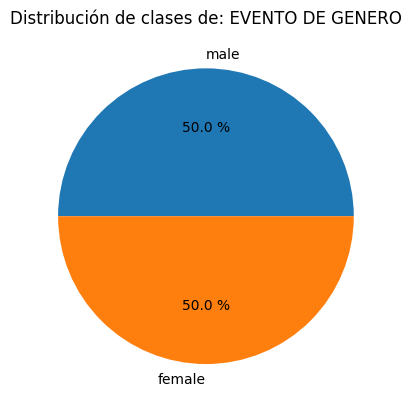

In [5]:
# vista gráfica de la distribución de clases
distribucion = datos.groupby('genero').size()
plt.pie(distribucion, labels = ['male','female'], autopct="%0.1f %%")
plt.title('Distribución de clases de: EVENTO DE GENERO')
plt.show()

# **5. NORMALIZACIÓN DE DATOS**

In [6]:
# Transformación por amplitud [0..1]
def Normalizacion_Amplitud(atributo):
    if pd.api.types.is_numeric_dtype(atributo): # Check if the attribute is numeric
        return (atributo - atributo.min())/(atributo.max() - atributo.min())
    else:
        return atributo # Return the attribute as is if it's not numeric

# Normaliza todos los atributos del dataframe
def NormalizarTodo(datos):
    for col in datos.columns:
        datos[col] = Normalizacion_Amplitud(datos[col])
    return datos

In [7]:
datos = NormalizarTodo(datos)
datos.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,male
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,male
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,male
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,male
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,male


# **6. SEPARACIÓN DE DATOS PARA PRUEBA Y ENTRENAMIENTO**

In [ ]:
# Separa datos para entrenamiento y test
def Separacion(datos, porcentaje_test = 0.25):
    dat_test = datos.sample(frac = porcentaje_test)
    dat_train = datos.drop(dat_test.index)
    return dat_train, dat_test

In [ ]:
train, test = Separacion(datos, 0.3)

# **7. ENTRENAMIENTO DE PERCEPTRÓN**

In [ ]:
# El último atributo debe ser de SALIDA
# datos.shape[1]-1:  cantidad de atributos de entrada
RNA = Perceptron(datos.shape[1]-1)
Epocas = 1500
CoefAprend = 0.01
# Ensure the last column (target values) in the training data is of numeric type

# Convert 'male' to 0 and other values to 1
train.iloc[:, -1] = train.iloc[:, -1].apply(lambda x: 0 if x == 'male' else 1)

W, T = RNA.Entrenar(train.values, Epocas, CoefAprend)
print('Pesos: ', W)
print('Sesgo (teta): ', T)

Pesos:  [-1.06716818  0.41033211  5.17534757  3.91681436 -3.75530377 -8.42833308
  0.1492182   2.82990353 -8.0948696   7.95423223 -0.35789185 -1.68545351
 27.6845335  -4.6083441   1.12223953 -1.28188246  0.14255793  0.35588558
 -0.37579713  0.43770796]
Sesgo (teta):  8.199147604324025


# **8. TEST DE PERCEPTRÓN**

In [ ]:
class Perceptron:
    # ... other methods ...
    def Test(self, datos):
      for i in range(datos.shape[0]):  # Para cada instancia en el conjunto de prueba
        X = datos[i, 0:self.N]  # Obtener las características de entrada
        Y = datos[i, self.N]  # Obtener el valor objetivo real
        YR = self.Activacion(self.Sumatoria(X))  # Calcular la predicción

        print(f"Instancia {i}: Predicción = {YR}, Valor real = {Y}")  # Imprimir predicción y valor real
        print(f"Before: VP={self.MC['VP']}, VN={self.MC['VN']}, FP={self.MC['FP']}, FN={self.MC['FN']}")

        if YR == 1 and Y == 1:
            self.MC['VP'] += 1
        if YR == 0 and Y == 0:
            self.MC['VN'] += 1
        if YR == 1 and Y == 0:
            self.MC['FP'] += 1
        if YR == 0 and Y == 1:
            self.MC['FN'] += 1
        print(f"After: VP={self.MC['VP']}, VN={self.MC['VN']}, FP={self.MC['FP']}, FN={self.MC['FN']}")

    def Exactitud(self):
        # Cálculo de la exactitud del modelo
        # Check if the denominator is zero to prevent ZeroDivisionError
        if (self.MC['VP'] + self.MC['VN'] + self.MC['FP'] + self.MC['FN']) == 0:
            return 0  # or handle the case as needed (e.g., raise an exception, return None, etc.)
        else:
            return (self.MC['VP']+self.MC['VN'])/(self.MC['VP']+self.MC['VN']+self.MC['FP']+self.MC['FN'])

In [ ]:
# Test con datos de prueba
RNA.Test(test.values)

{'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0}

In [ ]:
RNA.Exactitud()

ZeroDivisionError: division by zero

#  **9. PREDICCIÓN**

In [ ]:
# Ejemplo de predicción de nuevo valor
RNA.Prediccion([0.56, 0.0,	0.05, 0.0, 0.07, 1.0, 0.28, 0.16, 0.49, 1.0, 0.0, 0.0])

1